# 1. Visualización de datos

In [ ]:
import sklearn
import pandas
import numpy as np

file = "/content/drive/MyDrive/3º GII/2Cuatri/AA/Praticas/Practica3/Clasificacion/bank-full.csv"

X = pandas.read_csv(file, sep=";")

X = X.to_numpy()

y = X[:,16]

X = X[:,0:16]

from sklearn.model_selection import train_test_split

np.random.seed(0)
# Conjuntos de train y test
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)  

print("Conjunto de training: ",x_train.shape, " // ", y_train.shape)
print("Conjunto de test: ",x_test.shape, " // ", y_test.shape)

Conjunto de training:  (36168, 16)  //  (36168,)
Conjunto de test:  (9043, 16)  //  (9043,)


In [ ]:
pandas.DataFrame(x_test).to_csv("/content/drive/MyDrive/3º GII/2Cuatri/AA/Praticas/Practica3/Clasificacion/data/X_test_orig.csv")
pandas.DataFrame(y_test).to_csv("/content/drive/MyDrive/3º GII/2Cuatri/AA/Praticas/Practica3/Clasificacion/data/y_test.csv")

## Porcentaje de cada clase

In [ ]:
features = {
    "age": 0,"job":1,"marital":2,"education":3,"default":4,"balance":5,"housing":6,"loan":7,"contact":8,"day":9,
    "month":10,"duration":11,"campaign":12,"pdays":13,"previous":14,"poutcome":15
}

Porcentaje yes:  11.68436186684362 %
Porcentaje no:  88.31563813315638 %


(array([ 4226.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 31942.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

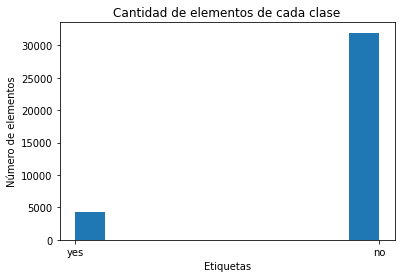

In [ ]:
import matplotlib.pyplot as plt

unique, count = np.unique(y_train, return_counts=True)
cuentas = dict(zip(unique,count))

print("Porcentaje yes: ", cuentas["yes"]/y_train.size*100,"%")
print("Porcentaje no: ",cuentas["no"]/y_train.size*100,"%")

plt.title("Cantidad de elementos de cada clase")
plt.ylabel("Número de elementos")
plt.xlabel("Etiquetas")
plt.hist(y_train)

## Resumen variables continuas

In [ ]:
print("==========EDAD==========")
print("Media: ", np.average(x_train[:,features["age"]]))
print("Desviación típica: ", np.std(x_train[:,features["age"]]))

print("==========DURACIÓN LLAMADA==========")
print("Media: ", np.average(x_train[:,features["duration"]]))
print("Desviación típica: ", np.std(x_train[:,features["duration"]]))

==========EDAD==========
Media:  40.89598540145985
Desviación típica:  10.61207538724399
==========DURACIÓN LLAMADA==========
Media:  257.63232691882325
Desviación típica:  257.69726504253146


## Resumen variables categóricas

In [ ]:
def count(columna, clasificacion,categoria):
  respuestas = np.zeros(2)
  for i in range(columna.size):
    if columna[i]==categoria:
      if clasificacion[i]=='yes':
        respuestas[0] += 1
      else:
        respuestas[1] +=1 
  return respuestas

### Puesto de trabajo

In [ ]:
trabajos = dict.fromkeys(np.unique(x_train[:,features['job']]))

for i in range(len(trabajos)):
  key = list(trabajos.keys())[i]
  trabajos[key] = count(x_train[:,features['job']],y_train,key)

trabajos_si = dict.fromkeys(np.unique(x_train[:,features['job']]))
trabajos_no = dict.fromkeys(np.unique(x_train[:,features['job']]))
for i in range(len(trabajos)):
  key = list(trabajos.keys())[i]
  trabajos_si[key] = trabajos[key][0]
  trabajos_no[key] = trabajos[key][1]

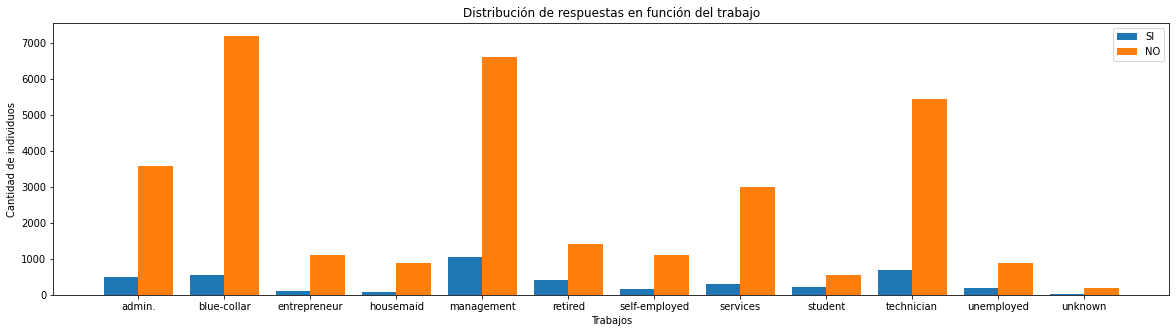

In [ ]:
import matplotlib.pyplot as plt

X_axis = np.arange(len(np.unique(x_train[:,features['job']])))

plt.figure(figsize=(20,5))

plt.bar(X_axis-0.2, trabajos_si.values(),0.4,label='SI')
plt.bar(X_axis+0.2, trabajos_no.values(),0.4,label='NO')

plt.xticks(ticks=X_axis,labels=np.unique(x_train[:,features['job']]))
plt.xlabel("Trabajos")
plt.ylabel("Cantidad de individuos")
plt.title("Distribución de respuestas en función del trabajo")
plt.legend()
plt.show()

### Estado civil

In [ ]:
marital = dict.fromkeys(np.unique(x_train[:,features['marital']]))

for i in range(len(marital)):
  key = list(marital.keys())[i]
  marital[key] = count(x_train[:,features['marital']],y_train,key)

print(marital)

marital_si = dict.fromkeys(np.unique(x_train[:,features['marital']]))
marital_no = dict.fromkeys(np.unique(x_train[:,features['marital']]))
for i in range(len(marital)):
  key = list(marital.keys())[i]
  marital_si[key] = marital[key][0]
  marital_no[key] = marital[key][1]

print(marital_si)
print(marital_no)

{'divorced': array([ 510., 3660.]), 'married': array([ 2175., 19551.]), 'single': array([1541., 8731.])}
{'divorced': 510.0, 'married': 2175.0, 'single': 1541.0}
{'divorced': 3660.0, 'married': 19551.0, 'single': 8731.0}


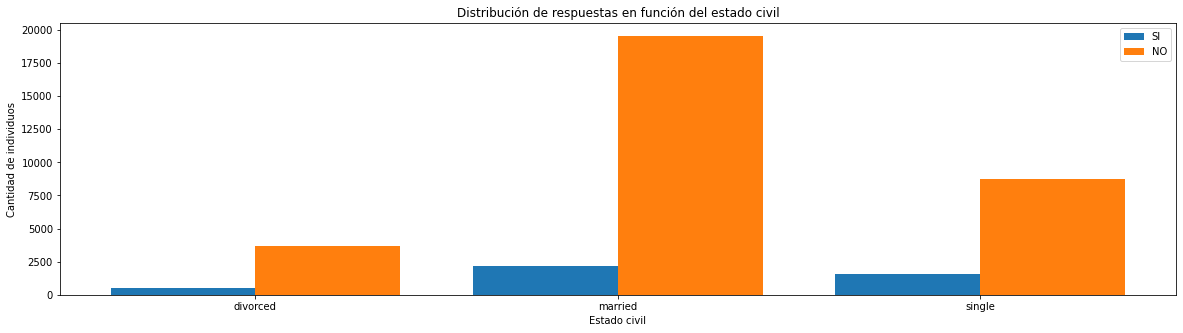

In [ ]:
import matplotlib.pyplot as plt

X_axis = np.arange(len(np.unique(x_train[:,features['marital']])))

plt.figure(figsize=(20,5))

plt.bar(X_axis-0.2, marital_si.values(),0.4,label='SI')
plt.bar(X_axis+0.2, marital_no.values(),0.4,label='NO')

plt.xticks(ticks=X_axis,labels=np.unique(x_train[:,features['marital']]))
plt.xlabel("Estado civil")
plt.ylabel("Cantidad de individuos")
plt.title("Distribución de respuestas en función del estado civil")
plt.legend()
plt.show()

### Estudios

In [ ]:
education = dict.fromkeys(np.unique(x_train[:,features['education']]))

for i in range(len(education)):
  key = list(education.keys())[i]
  education[key] = count(x_train[:,features['education']],y_train,key)

print(education)

education_si = dict.fromkeys(np.unique(x_train[:,features['education']]))
education_no = dict.fromkeys(np.unique(x_train[:,features['education']]))
for i in range(len(education)):
  key = list(education.keys())[i]
  education_si[key] = education[key][0]
  education_no[key] = education[key][1]

print(education_si)
print(education_no)

{'primary': array([ 473., 4987.]), 'secondary': array([ 1969., 16613.]), 'tertiary': array([1588., 9084.]), 'unknown': array([ 196., 1258.])}
{'primary': 473.0, 'secondary': 1969.0, 'tertiary': 1588.0, 'unknown': 196.0}
{'primary': 4987.0, 'secondary': 16613.0, 'tertiary': 9084.0, 'unknown': 1258.0}


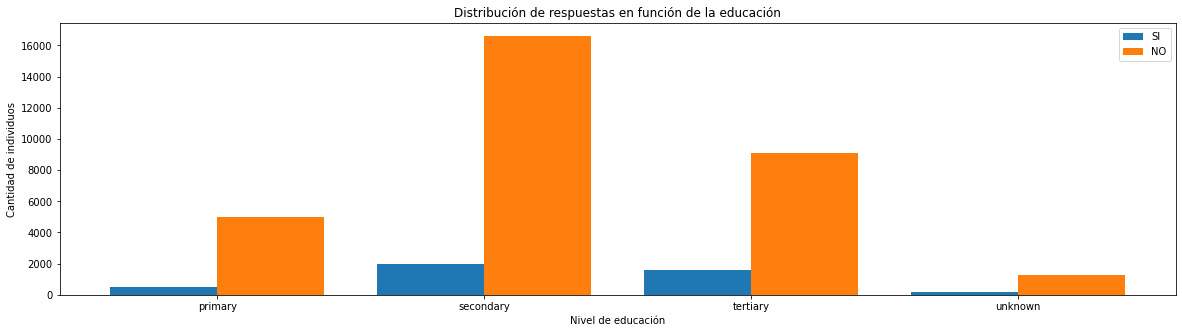

In [ ]:
import matplotlib.pyplot as plt

X_axis = np.arange(len(np.unique(x_train[:,features['education']])))

plt.figure(figsize=(20,5))

plt.bar(X_axis-0.2, education_si.values(),0.4,label='SI')
plt.bar(X_axis+0.2, education_no.values(),0.4,label='NO')

plt.xticks(ticks=X_axis,labels=np.unique(x_train[:,features['education']]))
plt.xlabel("Nivel de educación")
plt.ylabel("Cantidad de individuos")
plt.title("Distribución de respuestas en función de la educación")
plt.legend()
plt.show()

### Hipoteca

In [ ]:
housing = dict.fromkeys(np.unique(x_train[:,features['housing']]))

for i in range(len(housing)):
  key = list(housing.keys())[i]
  housing[key] = count(x_train[:,features['housing']],y_train,key)

print(housing)

housing_si = dict.fromkeys(np.unique(x_train[:,features['housing']]))
housing_no = dict.fromkeys(np.unique(x_train[:,features['housing']]))
for i in range(len(housing)):
  key = list(housing.keys())[i]
  housing_si[key] = housing[key][0]
  housing_no[key] = housing[key][1]

print(housing_si)
print(housing_no)

{'no': array([ 2703., 13429.]), 'yes': array([ 1523., 18513.])}
{'no': 2703.0, 'yes': 1523.0}
{'no': 13429.0, 'yes': 18513.0}


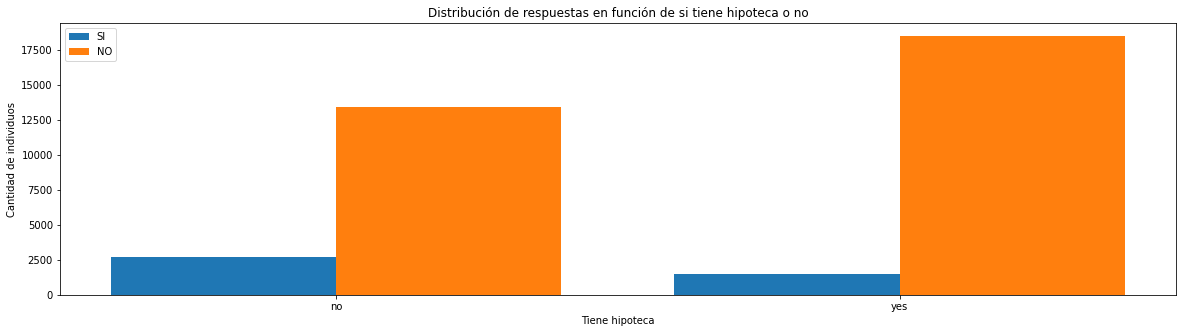

In [ ]:
import matplotlib.pyplot as plt

X_axis = np.arange(len(np.unique(x_train[:,features['housing']])))

plt.figure(figsize=(20,5))

plt.bar(X_axis-0.2, housing_si.values(),0.4,label='SI')
plt.bar(X_axis+0.2, housing_no.values(),0.4,label='NO')

plt.xticks(ticks=X_axis,labels=np.unique(x_train[:,features['housing']]))
plt.xlabel("Tiene hipoteca")
plt.ylabel("Cantidad de individuos")
plt.title("Distribución de respuestas en función de si tiene hipoteca o no")
plt.legend()
plt.show()

### Préstamo personal

In [ ]:
loan = dict.fromkeys(np.unique(x_train[:,features['loan']]))

for i in range(len(loan)):
  key = list(loan.keys())[i]
  loan[key] = count(x_train[:,features['loan']],y_train,key)

print(loan)

loan_si = dict.fromkeys(np.unique(x_train[:,features['loan']]))
loan_no = dict.fromkeys(np.unique(x_train[:,features['loan']]))
for i in range(len(loan)):
  key = list(loan.keys())[i]
  loan_si[key] = loan[key][0]
  loan_no[key] = loan[key][1]

print(loan_si)
print(loan_no)

{'no': array([ 3843., 26552.]), 'yes': array([ 383., 5390.])}
{'no': 3843.0, 'yes': 383.0}
{'no': 26552.0, 'yes': 5390.0}


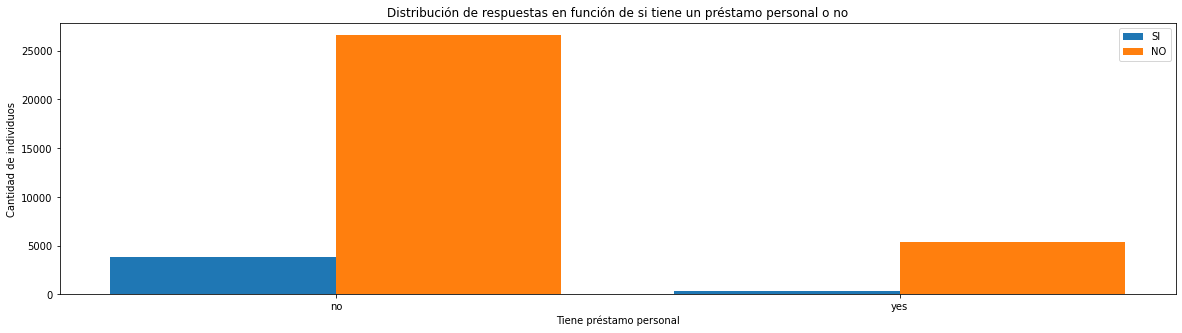

In [ ]:
import matplotlib.pyplot as plt

X_axis = np.arange(len(np.unique(x_train[:,features['loan']])))

plt.figure(figsize=(20,5))

plt.bar(X_axis-0.2, loan_si.values(),0.4,label='SI')
plt.bar(X_axis+0.2, loan_no.values(),0.4,label='NO')

plt.xticks(ticks=X_axis,labels=np.unique(x_train[:,features['loan']]))
plt.xlabel("Tiene préstamo personal")
plt.ylabel("Cantidad de individuos")
plt.title("Distribución de respuestas en función de si tiene un préstamo personal o no")
plt.legend()
plt.show()

# 3. Conjuntos de training, validación y test

In [ ]:
## Ya está hecho antes

# 4. Preprocesado de variables


## Variables categóricas

job, marital, education, contact y poutcome.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
categoricas = x_train[:,[features["job"],features["marital"],features["education"],features["contact"],features["poutcome"]]]
encoder.fit(categoricas)

OneHotEncoder()

In [ ]:
encoder.categories_

[array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 array(['divorced', 'married', 'single'], dtype=object),
 array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 array(['cellular', 'telephone', 'unknown'], dtype=object),
 array(['failure', 'other', 'success', 'unknown'], dtype=object)]

Nos deben salir 26 columnas

In [ ]:
encoder.transform(categoricas).toarray().shape

(36168, 26)

In [ ]:
onehot_categoricas = encoder.transform(categoricas).toarray()

## Variables binarias

default,housing,loan

In [ ]:
def transform_binarias(column):
  result = np.zeros(column.size)
  i = 0
  for c in column:
    if c == "yes":
      result[i] = 1.0
    else:
      result[i] = 0.0
    i+=1
  return result

In [ ]:
binarias = np.zeros((len(x_train),3))

print(x_train[:,features["housing"]])

binarias[:,0] = transform_binarias(x_train[:,features["default"]])
binarias[:,1] = transform_binarias(x_train[:,features["housing"]])
binarias[:,2] = transform_binarias(x_train[:,features["loan"]])

print(binarias)

['no' 'no' 'yes' ... 'no' 'no' 'yes']
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]]


## Variables cíclicas

In [ ]:
def sin_cos(m):
  months = {"jan":0,"feb":1,"mar":2,"apr":3,"may":4,"jun":5,"jul":6,"aug":7,"sep":8,"oct":9,"nov":10,"dec":11}
  return np.sin(2*np.pi*months[m]/12), np.cos(2*np.pi*months[m]/12)

def month_encoder(column):
  result = np.zeros([column.size,2])
  i = 0
  for m in column:
    result[i,0], result[i,1] = sin_cos(m)
    i+=1
  return result

In [ ]:
sin_cos_columns = month_encoder(x_train[:,features["month"]])

In [ ]:
def sin_cos_day(d):
  return np.sin(2*np.pi*d/31),np.cos(2*np.pi*d/31)

def day_encoder(column):
  result = np.zeros([column.size,2])
  i=0
  for d in column:
    result[i,0],result[i,1] = sin_cos_day(d)
    i+=1
  return result

In [ ]:
day_sin_cos = day_encoder(x_train[:,features["day"]])
print(day_sin_cos.shape)

(36168, 2)


In [ ]:
x_train_transformed = np.delete(x_train, [features["job"],features["marital"],features["education"],features["contact"],features["poutcome"],features["default"],features["housing"],features["loan"],features["month"],features["day"]],1)

print(x_train_transformed.shape)
x_train_final = []

(36168, 6)


In [ ]:
x_train_final = np.append(x_train_transformed, onehot_categoricas, 1)
x_train_final = np.append(x_train_final, sin_cos_columns, 1)
x_train_final = np.append(x_train_final, day_sin_cos,1)
x_train_final = np.append(x_train_final, binarias, 1)

print(x_train_final.shape)

(36168, 39)


In [ ]:
np.savetxt("/content/drive/MyDrive/3º GII/2Cuatri/AA/Praticas/Practica3/Clasificacion/Nx39.csv",x_train_final,delimiter=";")

## Escalado

Solo se escalan las 6 primeras porque binarias y one-hot ya en 0-1, sin-cos en -1-1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train_final)
x_train_transformed = scaler.transform(x_train_final)

min = x_train_transformed[0,0]
max = x_train_transformed[0,0]

for i in range(len(x_train_transformed)):
  for j in range(x_train_transformed[i].size):
    if x_train_transformed[i,j] > max:
      max = x_train_transformed[i,j]
    if x_train_transformed[i,j] < min:
      min = x_train_transformed[i,j]

print(min, ", ",max)
print(x_train_transformed.shape)

0.0 ,  1.0
(36168, 39)


In [ ]:
def transform_class(y):
  result = np.zeros(y.size)
  for i in range(y.size):
    if y[i] == "yes":
      result[i] = 1.0
    else:
      result[i] = -1.0
  return result

In [ ]:
print(x_train_transformed.shape)
print(y_train.shape)

pandas.DataFrame(x_train_transformed).to_csv("/content/drive/MyDrive/3º GII/2Cuatri/AA/Praticas/Practica3/Clasificacion/data/X_train.csv",sep=";")
pandas.DataFrame(transform_class(y_train)).to_csv("/content/drive/MyDrive/3º GII/2Cuatri/AA/Praticas/Practica3/Clasificacion/data/y_train.csv",sep=";")

(36168, 39)
(36168,)


# 6. Selección de modelo, parámetros y regularización


In [ ]:
import pandas
import numpy as np

x_train_file = "/content/drive/MyDrive/3º GII/2Cuatri/AA/Praticas/Practica3/Clasificacion/data/X_train.csv"
y_train_file = "/content/drive/MyDrive/3º GII/2Cuatri/AA/Praticas/Practica3/Clasificacion/data/y_train.csv"

X = pandas.read_csv(x_train_file, sep=";").to_numpy()[:,1:]
y = pandas.read_csv(y_train_file, sep=";").to_numpy()[:,1]

print(X)
print(y.size)

[[0.50649351 0.07877726 0.14721431 ... 0.         0.         0.        ]
 [0.24675325 0.08822835 0.01281009 ... 0.         0.         0.        ]
 [0.22077922 0.09843299 0.02074014 ... 0.         1.         0.        ]
 ...
 [0.22077922 0.07573584 0.05307035 ... 0.         0.         0.        ]
 [0.67532468 0.07839595 0.03029687 ... 0.         0.         0.        ]
 [0.36363636 0.07332087 0.03944693 ... 0.         1.         0.        ]]
36168


## Perceptron

### Max_iter

In [ ]:
from sklearn.linear_model import Perceptron

pla = Perceptron()

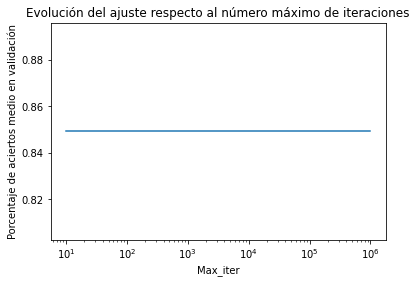

In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

np.random.seed(0)
num_exp = 6
Ecvs_medios = np.zeros(num_exp)
xs = np.zeros(6)

max_iter = 10
for i in range(num_exp):
  xs[i] = max_iter
  Ecvs_medios[i] = np.average(cross_val_score(Perceptron(max_iter=max_iter),X,y,cv=5,scoring='accuracy'))
  max_iter *= 10

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(xs, Ecvs_medios)
ax.set_title("Evolución del ajuste respecto al número máximo de iteraciones")
ax.set_xlabel("Max_iter")
ax.set_ylabel("Porcentaje de aciertos medio en validación")
ax.set_xscale("log")

### Regularization, lr, lambda y tol

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'penalty':['l1','l2'],
          'alpha':[1e-6,1e-5,1e-4],
          'eta0':[0.1,1,10],
          'tol':[1e-3,1e-2,0.1]}

pla = GridSearchCV(Perceptron(max_iter=100,n_jobs=-1),params,n_jobs=-1)
pla.fit(X,y)

GridSearchCV(estimator=Perceptron(max_iter=100, n_jobs=-1), n_jobs=-1,
             param_grid={'alpha': [1e-06, 1e-05, 0.0001], 'eta0': [0.1, 1, 10],
                         'penalty': ['l1', 'l2'], 'tol': [0.001, 0.01, 0.1]})

In [ ]:
print(pla.best_params_)

{'alpha': 1e-06, 'eta0': 1, 'penalty': 'l2', 'tol': 0.001}


In [ ]:
PLA = Perceptron(penalty='l2',alpha=1e-6,eta0=1,tol=1e-3,max_iter=100,n_jobs=-1)

## Regresión logística

In [ ]:
from sklearn.linear_model import LogisticRegression

### Max_iter

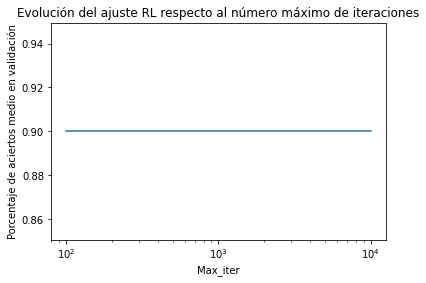

In [ ]:
np.random.seed(0)
num_exp = 3
Ecvs_medios = np.zeros(num_exp)
xs = np.zeros(num_exp)

max_iter = 1e2
for i in range(num_exp):
  xs[i] = max_iter
  Ecvs_medios[i] = np.average(cross_val_score(LogisticRegression(max_iter=max_iter,solver='liblinear'),X,y,cv=5,scoring='accuracy'))
  max_iter *= 10

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(xs, Ecvs_medios)
ax.set_title("Evolución del ajuste RL respecto al número máximo de iteraciones")
ax.set_xlabel("Max_iter")
ax.set_ylabel("Porcentaje de aciertos medio en validación")
ax.set_xscale("log")

### Solver, Regularizacion, Constante de regularización, Tol, Warm_start

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

params_rl = {'penalty':['l1','l2'],
          'solver':['liblinear','saga'],
          'tol':[1e-5,1e-4,1e-3],
          'C':[1e-2,0.1,1],
          'warm_start':[True,False]}

RL = GridSearchCV(LogisticRegression(max_iter=100,n_jobs=-1),params_rl,n_jobs=-1)
RL.fit(X,y)

GridSearchCV(estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga'],
                         'tol': [1e-05, 0.0001, 0.001],
                         'warm_start': [True, False]})

In [ ]:
print(RL.best_params_)

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.001, 'warm_start': True}


In [ ]:
RL = LogisticRegression(C=0.1,penalty='l1',solver='saga',tol=0.001,warm_start=True,n_jobs=-1)

## Comparación PLA - RL

In [ ]:
Errs = {'PLA':cross_val_score(PLA, X,y,cv=5,scoring='accuracy'), 
        'RL' :cross_val_score(RL, X,y,cv=5,scoring='accuracy')}

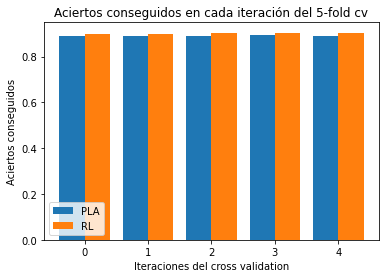

In [ ]:
X_axis = np.arange(len(Errs['PLA']))

plt.bar(X_axis-0.2, Errs['PLA'],0.4,label='PLA')
plt.bar(X_axis+0.2, Errs['RL'],0.4,label='RL')

plt.xticks(X_axis,X_axis)
plt.xlabel("Iteraciones del cross validation")
plt.ylabel("Aciertos conseguidos")
plt.title("Aciertos conseguidos en cada iteración del 5-fold cv")
plt.legend(loc=3)
plt.show()

# Entrenamiento RL

In [ ]:
RL.fit(X,y)

print(RL.coef_)
print("Ein: ", 1-RL.score(X,y))

[[ 0.00000000e+00  0.00000000e+00  1.88835503e+01 -2.32726965e+00
   0.00000000e+00  0.00000000e+00  1.94368631e-01 -1.37005047e-01
  -1.53602519e-01 -1.37235647e-01  1.39198562e-02  5.81507604e-01
   0.00000000e+00 -5.90589784e-02  5.81272813e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.13066011e-01
   1.04604458e-01 -1.62119016e-01 -3.26528440e-03  1.95704822e-01
   0.00000000e+00  1.46436204e-01  0.00000000e+00 -1.10333061e+00
  -2.70546166e-02  1.80696492e-02  2.26866786e+00 -3.06664779e-01
   3.34232908e-01  2.38566699e-01  1.02170633e-01  4.12996077e-02
   0.00000000e+00 -8.32387454e-01 -5.53401515e-01]]
Ein:  0.09925901349259014


In [ ]:
print(RL.score(X,y))

0.9007409865074099


## Comparación con estimador naive

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

Evs = {'RL':cross_val_score(LogisticRegression(max_iter=1e3,penalty='l1',solver='liblinear',C=1e-1),X,y,scoring='accuracy'),
       'Common':cross_val_score(DummyClassifier(strategy='most_frequent'),X,y,scoring='accuracy')}

print("Relación accuracy RL vs Most Common: ", Evs['RL'].mean(), " ," ,Evs['Common'].mean())

Relación desempeño RL_unbalanced vs Most Common:  0.9006858139251406  , 0.8831563823245692


In [ ]:
cross_val_score(LogisticRegression(max_iter=1e3,penalty='l1',solver='liblinear',C=1e-1),X,y,scoring='accuracy').mean()

0.9006858139251406

In [ ]:
Recallsvs = Evs = {'RL':cross_val_score(LogisticRegression(max_iter=1e3,penalty='l1',solver='liblinear',C=1e-1),X,y,scoring='recall'),
       'Common':cross_val_score(DummyClassifier(strategy='most_frequent'),X,y,scoring='recall')}

print("Relación recall RL vs Most Common: ", Recallsvs['RL'].mean(), " ," ,Recallsvs['Common'].mean())

Relación recall RL vs Most Common:  0.31022451634562925  , 0.0


## Desbalanceo de clases

In [ ]:
def recall(y_true,y_predict):
  TP = 0
  P = 0
  for i in range(y_true.size):
    if y_true[i]==1.0:
      P+=1
      if y_predict[i]==1.0:
        TP += 1
  return TP/P

In [ ]:
RL = LogisticRegression(max_iter=1e3, penalty='l1',solver = 'liblinear',C=1e-1)
RL.fit(X,y)
print("Recall en la muestra: ", recall(y,RL.predict(X)))

Recall en la muestra:  0.31282536677709416


In [ ]:
unique, counts = np.unique(y, return_counts=True)
proporciones = dict(zip(unique, counts))

print(proporciones)

prop = proporciones[-1.0]/proporciones[1.0]

proporciones[-1.0] = 1
proporciones[1.0] = prop

{-1.0: 31942, 1.0: 4226}


In [ ]:
RL = LogisticRegression(max_iter=1e3, penalty='l1',solver = 'liblinear',C=1e-1,class_weight=proporciones)
RL.fit(X,y)
print("Recall: ", recall(y, RL.predict(X))) 
print("Porcentaje de aciertos en la muestra: ", RL.score(X,y))

Recall:  0.7998106956933271
Porcentaje de aciertos en la muestra:  0.8313426233134262


# Conjunto de test

In [ ]:
x_test_file = "/content/drive/MyDrive/3º GII/2Cuatri/AA/Praticas/Practica3/Clasificacion/data/X_test_orig.csv"
y_test_file = "/content/drive/MyDrive/3º GII/2Cuatri/AA/Praticas/Practica3/Clasificacion/data/y_test.csv"

X_test = pandas.read_csv(x_test_file, sep=",").to_numpy()[:,1:]
y_test = pandas.read_csv(y_test_file, sep=";").to_numpy()[:,1]

print(X_test.shape)
print(y_test)

(9043, 16)
[-1.  1. -1. ... -1.  1. -1.]


### Preprocesado

In [ ]:
categoricas_test = X_test[:,[features["job"],features["marital"],features["education"],features["contact"],features["poutcome"]]]

one_hot_test = encoder.transform(categoricas_test)
print(one_hot_test.toarray().shape)

(9043, 26)


In [ ]:
def transform_binarias(column):
  result = np.zeros(column.size)
  i = 0
  for c in column:
    if c == "yes":
      result[i] = 1.0
    else:
      result[i] = 0.0
    i+=1
  return result

In [ ]:
binarias = np.zeros((len(X_test),3))

binarias[:,0] = transform_binarias(X_test[:,features["default"]])
binarias[:,1] = transform_binarias(X_test[:,features["housing"]])
binarias[:,2] = transform_binarias(X_test[:,features["loan"]])

print(binarias)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]


In [ ]:
day_coded_test = day_encoder(X_test[:,features["day"]])
month_coded_test = month_encoder(X_test[:,features["month"]])

print(day_coded_test)
print(month_coded_test)

[[ 0.89780454 -0.44039415]
 [ 0.29936312 -0.95413926]
 [ 0.99871651 -0.05064917]
 ...
 [-0.93775213  0.34730525]
 [ 0.84864426  0.52896401]
 [ 0.99871651 -0.05064917]]
[[ 1.22464680e-16 -1.00000000e+00]
 [ 1.00000000e+00  6.12323400e-17]
 [ 1.22464680e-16 -1.00000000e+00]
 ...
 [ 1.22464680e-16 -1.00000000e+00]
 [ 5.00000000e-01 -8.66025404e-01]
 [ 1.22464680e-16 -1.00000000e+00]]


In [ ]:
X_test_transformed = np.delete(X_test, [features["job"],features["marital"],features["education"],features["contact"],features["poutcome"],features["default"],features["housing"],features["loan"],features["month"],features["day"]],1)

print(X_test_transformed.shape)

(9043, 6)


In [ ]:
X_test_final = np.append(X_test_transformed, one_hot_test.toarray(), 1)
X_test_final = np.append(X_test_final, month_coded_test, 1)
X_test_final = np.append(X_test_final, day_coded_test,1)
X_test_final = np.append(X_test_final, binarias, 1)

print(X_test_final.shape)

(9043, 39)


In [ ]:
X_test = scaler.transform(X_test_final)

print(X_test.shape)

pandas.DataFrame(X_test).to_csv("/content/drive/MyDrive/3º GII/2Cuatri/AA/Praticas/Practica3/Clasificacion/data/X_test.csv",sep=";")

(9043, 39)


In [ ]:
print(transform_class(y_test))

[-1.  1. -1. ... -1.  1. -1.]


In [ ]:
pandas.DataFrame(transform_class(y_test)).to_csv("/content/drive/MyDrive/3º GII/2Cuatri/AA/Praticas/Practica3/Clasificacion/data/y_test.csv",sep=";")

# Cota Eout

In [ ]:
x_test_file = "/content/drive/MyDrive/3º GII/2Cuatri/AA/Praticas/Practica3/Clasificacion/data/X_test.csv"
y_test_file = "/content/drive/MyDrive/3º GII/2Cuatri/AA/Praticas/Practica3/Clasificacion/data/y_test.csv"

X_test = pandas.read_csv(x_test_file, sep=";").to_numpy()[:,1:]
y_test = pandas.read_csv(y_test_file, sep=";").to_numpy()[:,1]

print(X_test)
print(y_test)

[[0.24675325 0.08554101 0.01850346 ... 0.         1.         0.        ]
 [0.23376623 0.07050642 0.21817812 ... 0.         1.         0.        ]
 [0.37662338 0.06911735 0.04941033 ... 0.         0.         1.        ]
 ...
 [0.12987013 0.07286692 0.01016673 ... 0.         0.         0.        ]
 [0.53246753 0.07280337 0.16510777 ... 0.         0.         0.        ]
 [0.41558442 0.06994353 0.0351769  ... 0.         0.         1.        ]]
[-1.  1. -1. ... -1.  1. -1.]


In [ ]:
print("Porcentaje de acierto en test: ", RL.score(X_test,y_test))
print("Cota E_out: ", (1-RL.score(X_test,y_test))+np.sqrt(1/(2*y_test.size)*np.log(2/0.05)))

Porcentaje de acierto en test:  0.8239522282428398
Cota E_out:  0.19032934227083848


# Curvas de aprendizaje

## Con regularización

In [ ]:
Eins = []
Evals = []
Ns = []

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

RL = LogisticRegression(max_iter=1e3, penalty='l1',solver = 'liblinear',C=1e-1,class_weight=proporciones)

from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)

for i in range(20,y_train.size//20,20):
  RL.fit(X_train[:i,:],y_train[:i])
  Eins.append(1-RL.score(X_train[:i,:],y_train[:i]))
  Evals.append(1-RL.score(X_val,y_val))
  Ns.append(i)

ValueError: ignored

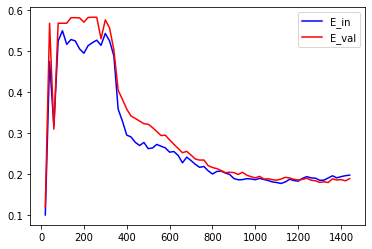

In [ ]:
import matplotlib.pyplot as plt

plt.plot(Ns, Eins, c='b',label='E_in')
plt.plot(Ns, Evals, c='r',label='E_val')
plt.legend()
plt.show()

## Sin regularización

In [ ]:
RL = LogisticRegression(max_iter=1e4, penalty='none', class_weight=proporciones)

Eins = []
Evals = []
Ns = []

for i in range(20,y_train.size//20,20):
  RL.fit(X_train[:i,:],y_train[:i])
  Eins.append(1-RL.score(X_train[:i,:],y_train[:i]))
  Evals.append(1-RL.score(X_val,y_val))
  Ns.append(i)

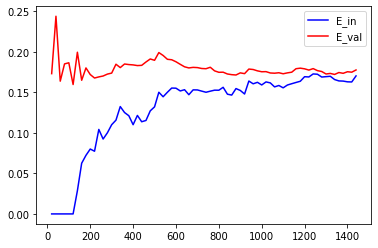

In [ ]:
import matplotlib.pyplot as plt

plt.plot(Ns, Eins, c='b',label='E_in')
plt.plot(Ns, Evals, c='r',label='E_val')
plt.legend()
plt.show()